In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
f = np.array([[1, 1, 1, 1],
              [8, 4, 2, 1],
              [3.375, 2.25, 1.5, 1],
              [27, 9, 3, 1]])

y = np.array([[1],
              [1],
              [0],
              [2]])

w = np.linalg.inv(f.T.dot(f)).dot(f.T).dot(y)

print(w)

[[ -2.33333333]
 [ 14.5       ]
 [-27.16666667]
 [ 16.        ]]


In [18]:
x = np.reshape(np.arange(0,4, 0.1), (40,1))
f2 = np.hstack((x*x*x, x*x, x, np.ones((40,1))))
y_hat = f2.dot(w)

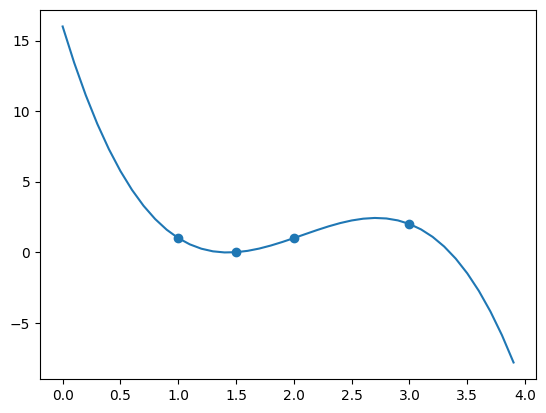

In [19]:
xy = np.array([[1, 1],
                      [2, 1],
                      [1.5, 0],
                      [3, 2]])

plt.scatter(xy[:, 0], xy[:, 1])
plt.plot(x,y_hat)
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([[0, 1],
              [2, 0],
              [1, 2]])

poly = PolynomialFeatures(2)
f = poly.fit_transform(X)
print(f)

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 0. 4. 0. 0.]
 [1. 1. 2. 1. 2. 4.]]


In [24]:
from numpy import genfromtxt

stock_data = genfromtxt('stock_prediction_data_scaled.csv', delimiter=',')
stock_data

array([[ 0.039, -1.214, -0.715, ...,  0.953, -1.22 , -1.263],
       [ 0.281, -1.47 ,  0.499, ..., -0.344, -0.809, -0.841],
       [ 1.346, -0.352,  0.968, ...,  0.612, -0.559,  0.454],
       ...,
       [ 0.633,  1.083,  1.284, ...,  0.093, -0.7  , -0.675],
       [ 0.225, -0.98 , -0.138, ..., -0.542, -0.826, -1.639],
       [-0.189, -1.156,  0.526, ...,  0.612,  1.375, -1.432]])

In [25]:
stock_price = genfromtxt('stock_price.csv', delimiter=',')
stock_price

array([-3.100e-01, -1.686e+01,  1.360e+00,  1.275e+01,  7.910e+00,
       -2.750e+00, -5.400e-01, -1.151e+01, -4.010e+00,  3.080e+00,
       -8.230e+00, -1.400e-01,  2.560e+00, -6.870e+00,  4.430e+00,
        1.980e+00,  3.760e+00,  4.160e+00,  6.670e+00, -7.210e+00,
        3.220e+00,  1.100e+01, -2.150e+00,  6.330e+00, -4.350e+00,
        1.300e-01,  7.070e+00,  6.390e+00, -3.050e+00,  4.670e+00,
       -1.092e+01, -4.370e+00, -3.800e+00,  6.360e+00,  5.580e+00,
       -4.720e+00, -3.620e+00, -8.660e+00,  8.970e+00,  4.800e+00,
        6.470e+00,  3.380e+00, -1.280e+00, -1.309e+01, -1.160e+01,
        8.790e+00,  4.910e+00,  1.574e+01, -6.270e+00, -3.350e+00,
       -6.800e+00,  4.100e+00,  2.600e+00, -1.910e+00,  7.390e+00,
       -6.400e-01, -7.470e+00,  1.087e+01,  4.480e+00, -7.750e+00,
        9.720e+00,  1.480e+00,  1.137e+01, -3.020e+00,  8.970e+00,
       -4.960e+00,  1.330e+01,  2.940e+00,  8.380e+00, -2.730e+00,
        3.720e+00, -1.640e+00,  1.661e+01, -1.450e+00, -9.500e

In [40]:
w = np.linalg.inv(stock_data.T.dot(stock_data)).dot(stock_data.T).dot(stock_price)

w

y_pred = stock_data.dot(w)
Y = np.column_stack((y_pred, stock_price))
Y

array([[-1.14207086e+00, -3.10000000e-01],
       [-1.74997617e+01, -1.68600000e+01],
       [ 5.82796145e-01,  1.36000000e+00],
       [ 1.17425911e+01,  1.27500000e+01],
       [ 6.97993492e+00,  7.91000000e+00],
       [-3.89348225e+00, -2.75000000e+00],
       [-1.25491442e+00, -5.40000000e-01],
       [-1.18747698e+01, -1.15100000e+01],
       [-5.11771403e+00, -4.01000000e+00],
       [ 2.59234217e+00,  3.08000000e+00],
       [-8.99691146e+00, -8.23000000e+00],
       [-8.46765114e-01, -1.40000000e-01],
       [ 1.29214812e+00,  2.56000000e+00],
       [-7.87969530e+00, -6.87000000e+00],
       [ 3.73795276e+00,  4.43000000e+00],
       [ 9.31341907e-01,  1.98000000e+00],
       [ 2.91858128e+00,  3.76000000e+00],
       [ 3.12287623e+00,  4.16000000e+00],
       [ 5.70696333e+00,  6.67000000e+00],
       [-7.95644560e+00, -7.21000000e+00],
       [ 2.42262387e+00,  3.22000000e+00],
       [ 9.82146950e+00,  1.10000000e+01],
       [-3.07921159e+00, -2.15000000e+00],
       [ 5.

In [48]:
sum = 0
for i in Y:
    sum += (i[0] - i[1]) ** 2

MSE = sum / Y.shape[0]
MSE

0.7936461393924641